# Diatomic gases

Diatomic gases such as nitrogen (N$_2$) and oxygen (O$_2$) can store energy in additional modes beyond the translational modes: rotational and vibrational modes.

Statistical thermodynamics shows that, for an ideal gas, the molar specific internal energy is

$$
\overline{u} = M \frac{R_{\text{univ}} T}{2} \;,
$$

where $M$ is the number of energy modes, $T$ is the temperature, and $R_{\text{univ}}$ is the universal gas constant.

The molar specific heat capacity is then

$$
\overline{c}_v = M \frac{R_{\text{univ}}}{2} \;.
$$

For monatomic gases, $M=3$ for the three translational energy modes.
Diatomic gases have two additional energy modes for rotation, so $M=5$, and at higher temperatures vibrational energy modes also become important ($M=7$).

We can compare these relatively simple predictions of the molar specific heat capacity with calculations based on thermodynamic models.

In [5]:
import numpy as np
from CoolProp.CoolProp import PropsSI
from scipy.constants import physical_constants

from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity

# for convenience:
def to_si(quant):
    '''Converts a Pint Quantity to magnitude at base SI units.
    '''
    return quant.to_base_units().magnitude

gas_constant = Q_(
    physical_constants['molar gas constant'][0],
    physical_constants['molar gas constant'][1],
    )

In [1]:
import matplotlib.pyplot as plt
#%matplotlib inline

# these are mostly for making the saved figures nicer
#import matplotlib_inline.backend_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 300
plt.rcParams['savefig.dpi'] = 300

In [6]:
pressure = Q_(1, 'atm')
temperatures = Q_(np.geomspace(100, 4000, 50), 'K')

specific_heats_o2 = np.zeros(len(temperatures))
specific_heats_n2 = np.zeros(len(temperatures))

# 5 modes for diatomic molecules, 7 if vibrational modes significant
specific_heats_diatomic = np.ones(len(temperatures)) * (
    5 * gas_constant / 2
    ).to('kJ/(kmol*K)').magnitude
specific_heats_diatomic_vib = np.ones(len(temperatures)) * (
    7 * gas_constant / 2
    ).to('kJ/(kmol*K)').magnitude

for idx, temperature in enumerate(temperatures):
    # given in J/(mol*K)
    specific_heats_o2[idx] = PropsSI(
        'Cvmolar', 'T', to_si(temperature), 'P', to_si(pressure), 'oxygen'
        )
    specific_heats_n2[idx] = PropsSI(
        'Cvmolar', 'T', to_si(temperature), 'P', to_si(pressure), 'nitrogen'
        )

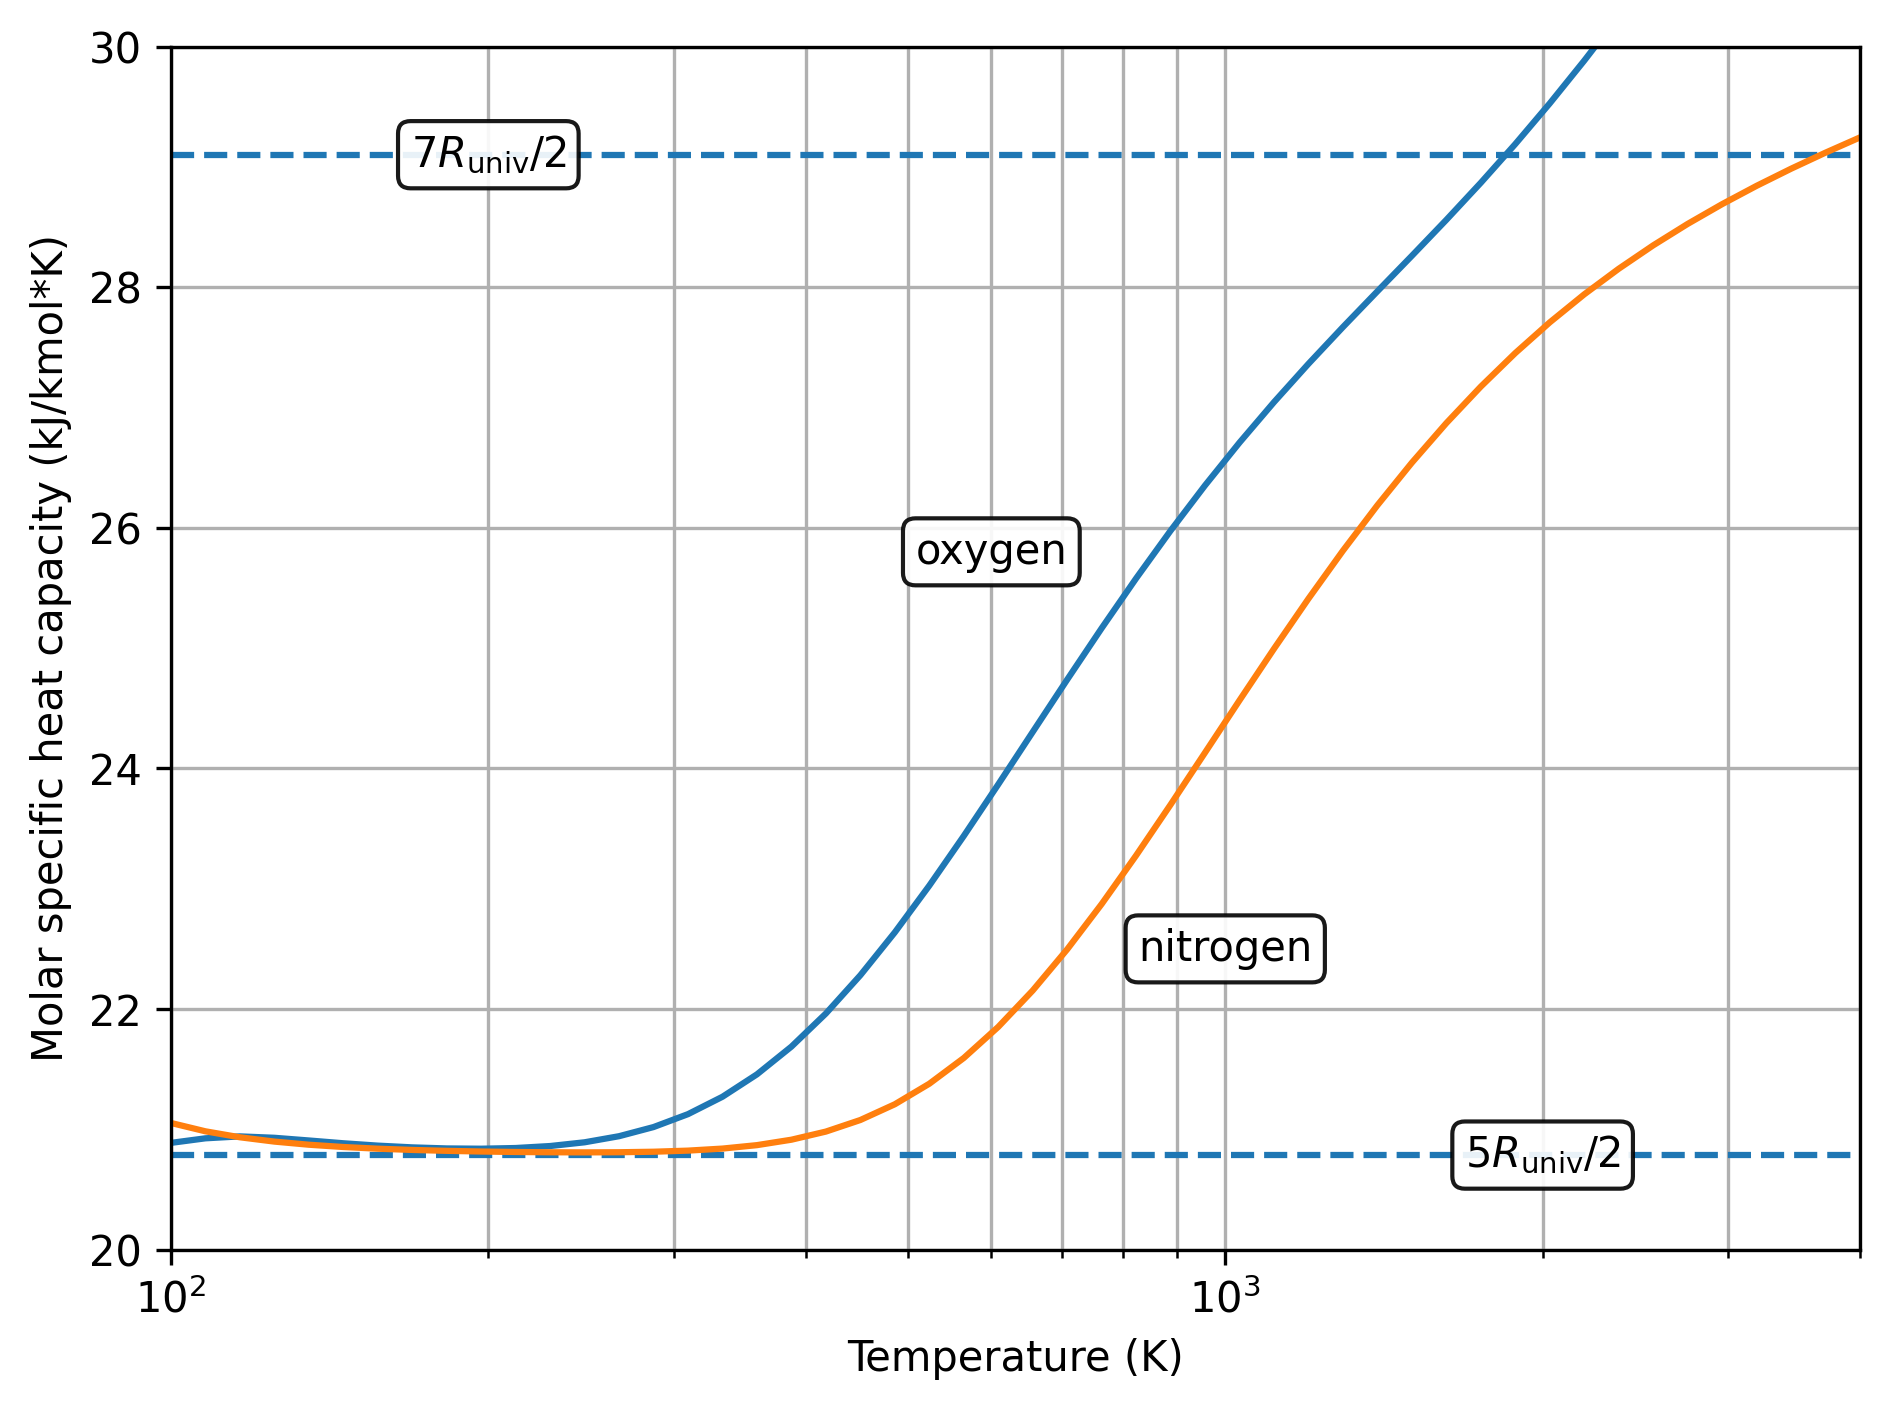

In [7]:
plt.semilogx(to_si(temperatures), specific_heats_diatomic, '--', color='tab:blue')
plt.semilogx(to_si(temperatures), specific_heats_diatomic_vib, '--', color='tab:blue')

plt.semilogx(to_si(temperatures), specific_heats_o2, color='tab:blue')
plt.semilogx(to_si(temperatures), specific_heats_n2, color='tab:orange')

plt.xlabel('Temperature (K)')
plt.ylabel('Molar specific heat capacity (kJ/kmol*K)')

plt.ylim(20, 30)
plt.xlim(100, 4000)

# text box properties
props = dict(boxstyle='round', facecolor='white', alpha=0.9)

plt.text(2000, specific_heats_diatomic[0], 
         r'$5 R_{\mathrm{univ}} / 2$', bbox=props, ha='center', va='center'
         )
plt.text(200, specific_heats_diatomic_vib[0], 
         r'$7 R_{\mathrm{univ}} / 2$', bbox=props, ha='center', va='center'
         )

plt.text(600, 25.8, 'oxygen', 
         bbox=props, ha='center', va='center'
         )
plt.text(1000, 22.5, 'nitrogen', 
         bbox=props, ha='center', va='center'
         )

plt.grid(True, which='both')
plt.tight_layout()
plt.show()

At low temperatures, the prediction based on translational and rotational energy modes matches the calculations fairly well, though as temperature increases the vibrational modes become more important.

Other sources for disagreement include intra-molecular forces, which the above statistical thermodynamics calculations neglect.